<a href="https://colab.research.google.com/github/tortas/Water-Pump-Competition/blob/master/Water_Pump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imports

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Load Data

from google.colab import files
import io

uploaded = files.upload()
train_features    = pd.read_csv(io.BytesIO(uploaded['train_features.csv']))
train_labels      = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
sample_submission = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
test_features     = pd.read_csv(io.BytesIO(uploaded['test_features.csv']))

Saving sample_submission.csv to sample_submission.csv
Saving test_features.csv to test_features.csv
Saving train_features.csv to train_features.csv
Saving train_labels.csv to train_labels.csv


In [0]:
train_labels      = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, stratify=train_labels, random_state=42)

In [6]:
train_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [10]:
features = ['longitude', 'latitude','construction_year','district_code','population','amount_tsh','gps_height']
# X_train['quantity'] = pd.factorize(X_train['quantity'])[0]
# X_train['basin'] = pd.factorize(X_train['basin'])[0]
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train[features],y_train)
model.score(X_test[features], y_test)

0.7214141414141414

In [11]:
model.feature_importances_

array([0.29981508, 0.29788644, 0.09308547, 0.04237231, 0.08329452,
       0.05794863, 0.12559755])

In [41]:
importances = pd.Series(model.feature_importances_,features)
importances

longitude            0.299815
latitude             0.297886
construction_year    0.093085
district_code        0.042372
population           0.083295
amount_tsh           0.057949
gps_height           0.125598
dtype: float64

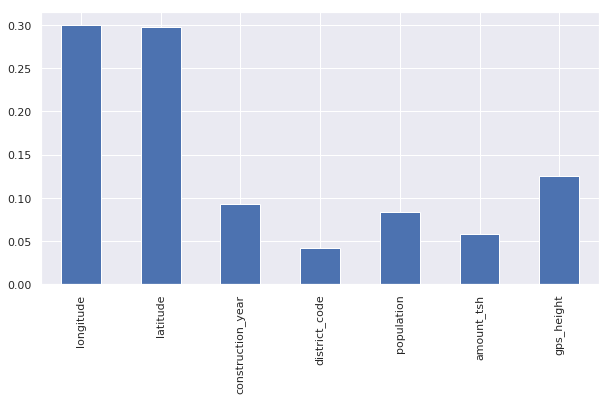

In [44]:
importances.plot(kind='bar', figsize=(10,5))

In [0]:
train = train_features.merge(train_labels, on='id')

In [67]:
train.shape

(59400, 41)

In [68]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


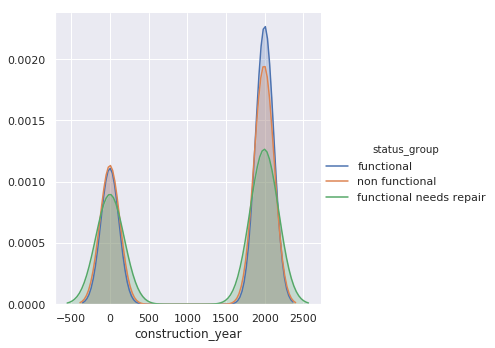

In [79]:
(sns
  .FacetGrid(train, 
             hue='status_group',height=5)
  .map(sns.kdeplot, 'construction_year', shade=True)
 .add_legend()
)

In [0]:
sample_submission = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
submission = sample_submission.copy()
submission['status_group'] = model.predict(test_features[features])
submission.to_csv('Lui-Seeback_Submission.csv', index=False)
files.download('Lui-Seeback_Submission.csv')